# Project 4 - introduction

## 1. Первичная обработка данных


### Исходные данные:

#### Датасет -
https://lms.skillfactory.ru/assets/courseware/v1/dab91dc74eb3cb684755123d224d262b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/bank_fin.zip

#### Шаблон -
https://lms.skillfactory.ru/assets/courseware/v1/25b424b830165c700109a3b9f1721661/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Project_4_ML.ipynb

### Данные о клиентах банка:

- age (возраст);
- job (сфера занятости);
- marital (семейное положение);
- education (уровень образования);
- default (имеется ли просроченный кредит);
- housing (имеется ли кредит на жильё);
- loan (имеется ли кредит на личные нужды);
- balance (баланс).

### Данные, связанные с последним контактом:

- contact (тип контакта с клиентом);
- month (месяц, в котором был последний контакт);
- day (день, в который был последний контакт);
- duration (продолжительность контакта в секундах).

### Прочие признаки:

- campaign (количество контактов с этим клиентом в течение текущей кампании);
- pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
- previous (количество контактов до текущей кампании)
- poutcome (результат прошлой маркетинговой кампании).

### Целевой признак:

- deposit.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

In [112]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [113]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [114]:
df['balance'].isnull().sum()

25

In [5]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

**В столбце balance есть nan и поэтому простой replace не работает, необходимо организовать условие с фильтрацией np.nan а после преобразование строки во float**

In [115]:
df['balance'] = df['balance'].apply(lambda x: float(x.replace(',', '.').replace(' $', '').replace(' ', '')) if x is not np.nan else x )

In [116]:
df['balance']

0        2343.0
1          45.0
2        1270.0
3        2476.0
4         184.0
          ...  
11157       1.0
11158     733.0
11159      29.0
11160       0.0
11161       0.0
Name: balance, Length: 11162, dtype: float64

In [117]:
round(df['balance'].mean(), 3)

1529.129

In [118]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

In [119]:
df['balance'].isnull().sum()

0

In [120]:
round(df['balance'].mean(), 3)

1526.936

Замените все пропущенные значения в признаке job на модальные. То же самое сделайте с признаком, отвечающим за уровень образования.

In [121]:
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])

In [122]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'self-employed', 'student'], dtype=object)

In [123]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [124]:
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

In [125]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование).

In [150]:
mask = df['job'] == df['job'].mode()[0]
mask1 = df['education'] == df['education'].mode()[0]
round(df[mask & mask1]['balance'].mean(), 3)

1598.883

### Задание 2.6 и 2.7

In [ ]:
# Анализ выбросов меодом Тьюки (строгое неравенство)
df_nb = df[(df['balance'] > lower_bound) & (df['balance'] < upper_bound)]

# Анализ выбросов меодом Тьюки (нестрогое неравенство)
df_nb = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

Эта функция по методу **Тьюки (межквартильного размаха)** принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

In [127]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    # outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return cleaned #,outliers

In [166]:
df_nb = outliers_iqr(df, 'balance')

In [160]:
print(f'Количество строк изначально: {df.shape[0]}')
print(f'Количество строк после удаления выбросов: {df_nb.shape[0]}')

Количество строк изначально: 11162
Количество строк после удаления выбросов: 10105


In [167]:
df_nb

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


После удаления выбросов в DF индексы получились с пробелами, чтобы в дальнейшем не возникало проблем переиндексируем DF

In [172]:
df_nb = df_nb.reset_index(drop = True)

In [175]:
df_nb

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
10101,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
10102,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
10103,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


Введите верхнюю и нижнюю границы поиска выбросов по методу Тьюки, округлив их до целых чисел.

In [97]:
def outliers_iqr_l(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [176]:
lower, upper = outliers_iqr_l(df, 'balance')
print(f'Нижняя граница по методу Тьюки: {int(lower)}')
print(f'Верхняя граница по методу Тьюки: {int(upper)}')

Нижняя граница по методу Тьюки: -2241
Верхняя граница по методу Тьюки: 4063


## 2. Разведывательный анализ данных (EDA)


Сколько клиентов открыли депозит?

<Axes: >

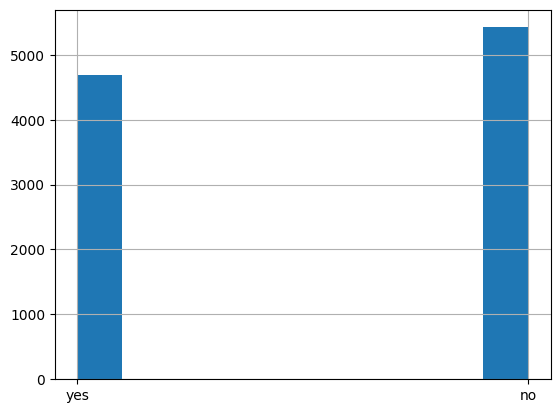

In [99]:
df_nb['deposit'].hist()

In [178]:
df_nb['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

Начнём с описательных статистик для количественных переменных.

* Рассчитайте их и продумайте подробную интерпретацию.
* Попробуйте описать данные, которые у вас есть, увидеть первые зависимости.
* Рассмотрите минимальные и максимальные значения.
* Посмотрите на меры разброса и оцените, насколько данные вариативны.
* Сравнив меры центральной тенденции, сделайте выводы о том, есть ли аномальные значения с меньшей или большей стороны.
* Дополните выводы визуализациями. Вспомните, какие диаграммы могут помочь в иллюстрации распределений количественных данных.

In [179]:
df_nb.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


In [23]:
# Более компактный способ создать список со столбцами необходимого типа
types = df_nb.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [13]:
# Создание списка с цыфровыми столбцами
cols_num = []
for x in df_nb.columns:
    if df_nb[x].dtype != 'object':
        if x not in ['age', 'balance']:
            cols_num.append(x)

In [22]:
print(list(enumerate(cat_features)))

[(0, 'job'), (1, 'marital'), (2, 'education'), (3, 'default'), (4, 'housing'), (5, 'loan'), (6, 'contact'), (7, 'month'), (8, 'poutcome'), (9, 'deposit')]


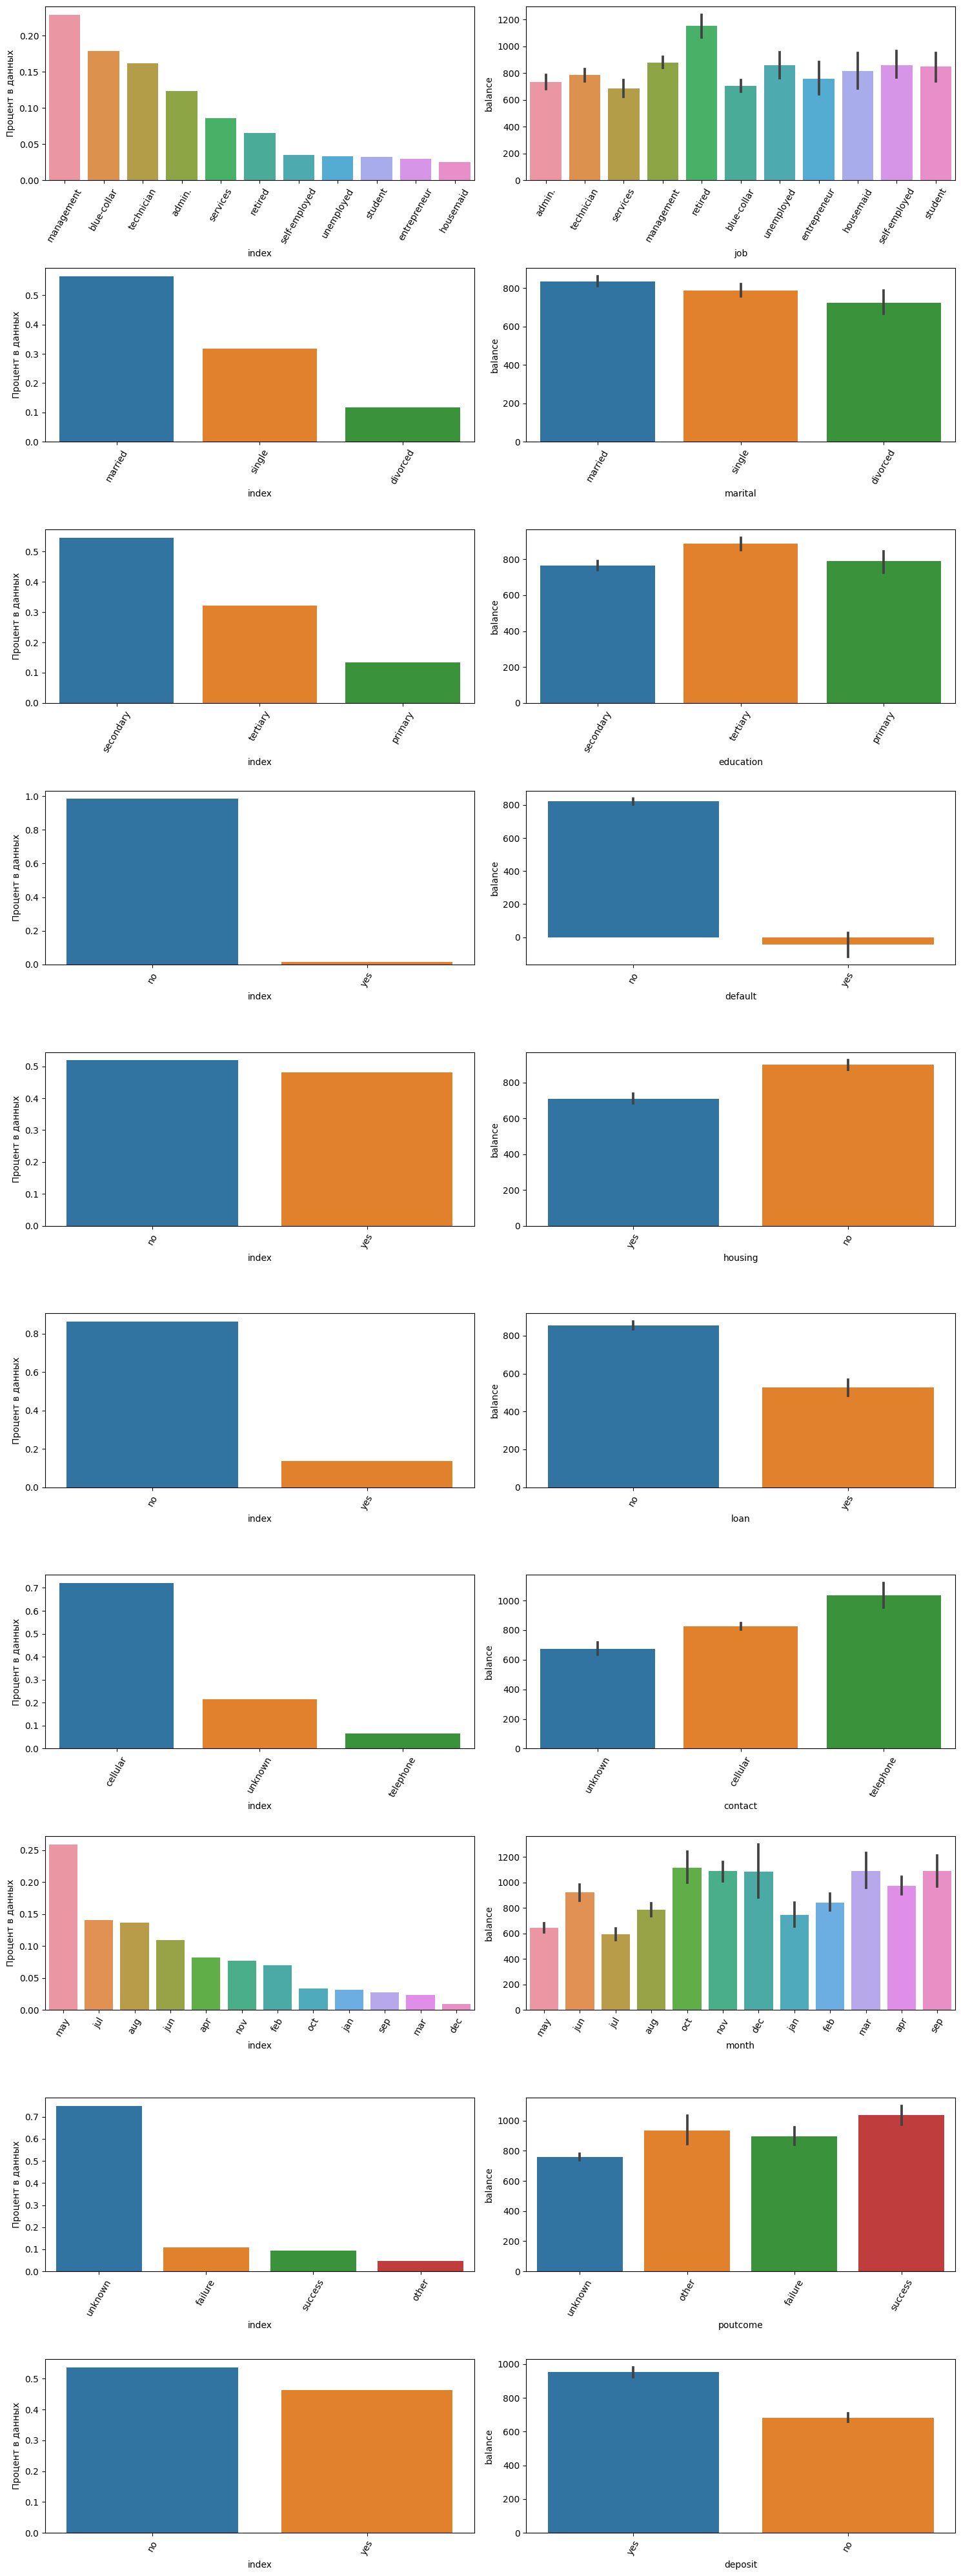

In [24]:
n = len(cat_features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cat_features):
    #Строим количественную столбчатую для долевого соотношения каждой из категорий в данных
    count_data = (df_nb[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('Процент в данных')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='Процент в данных', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    #Строим столбчатую диаграмму размера баланса от категории по столбцу
    mean_barplot = sns.barplot(data=df_nb, x=feature, y='balance', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout() #выравнивание графиков

In [26]:
# Создание списка с цыфровыми столбцами
cols_num = []
for x in df_nb.columns:
    if df_nb[x].dtype != 'object':
        if x not in ['balance']:
            cols_num.append(x)

In [24]:
# Более компактный способ создать список со столбцами необходимого типа
types = df_nb.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

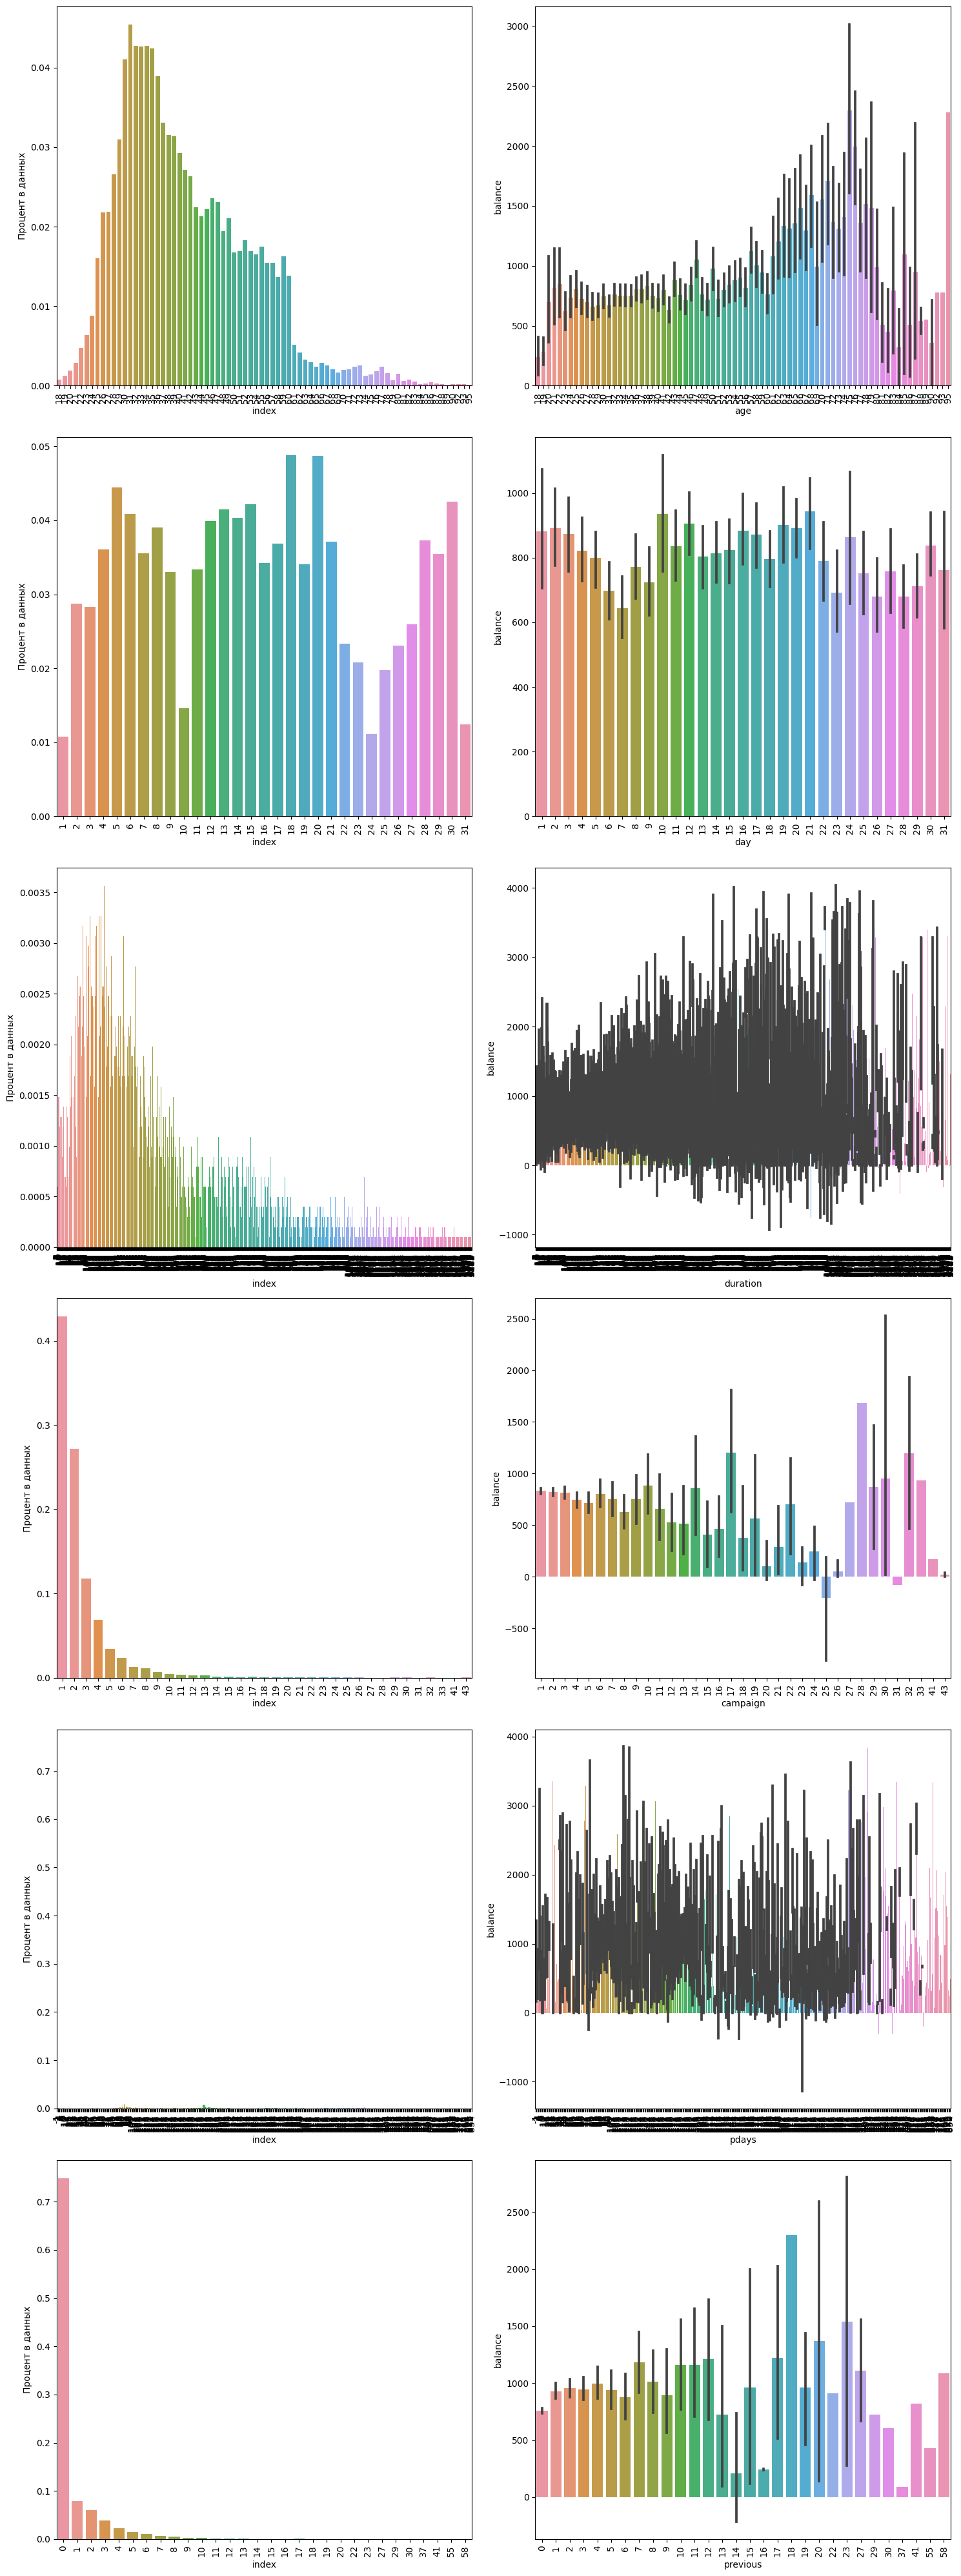

In [28]:
n = len(cols_num) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cols_num):
    #Строим количественную столбчатую для долевого соотношения каждой из категорий в данных
    count_data = (df_nb[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('Процент в данных')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='Процент в данных', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=90)
    #Строим столбчатую диаграмму размера баланса от категории по столбцу
    mean_barplot = sns.barplot(data=df_nb, x=feature, y='balance', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=90)
plt.tight_layout() #выравнивание графиков

Каков максимальный возраст клиента банка?

In [180]:
df_nb['age'].max()

95

Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд

In [181]:
df_nb['duration'].min()

2

Сколько было месяцев, в которых проводилась маркетинговая кампания?

In [182]:
df_nb['month'].nunique()

12

Сколько сфер занятости представлено среди клиентов банка?

In [183]:
df_nb['job'].nunique()

11

Какое семейное положение встречается чаще всего?

In [184]:
df_nb['marital'].mode()[0]

'married'

Какое образование встречается чаще всего?

In [185]:
df_nb['education'].mode()[0]

'secondary'

### Задание 3.6

Теперь давайте узнаем, есть ли разница в результатах текущей маркетинговой кампании и предыдущей. Возможно, люди, которые уже однажды согласились на предложение банка, более склонны принять его вновь. А возможно, ситуация ровно обратная. Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.

Смотрите подсказку. Значения статуса предыдущей кампании - это признак poutcome. Нужно посчитать количества значений целевой переменной, относящиеся к значениям poutcome.

<Axes: xlabel='poutcome'>

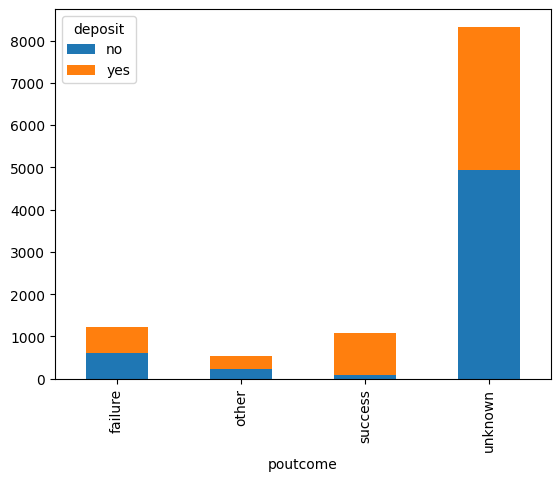

In [186]:
# Используем группировку 'deposit' по индексу 'poutcome'

types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Напишите значение статуса предыдущей кампании, для которой в текущей успехов намного больше, чем неудач.

In [187]:
types

deposit,no,yes
poutcome,,
failure,610,618
other,230,307
success,93,978
unknown,4940,3386


success

Задание 3.7

Теперь давайте узнаем, какова зависимость результата маркетинговых кампаний от месяца.

Временные периоды, сезоны, близость к каким-то праздникам часто влияют на решение клиентов использовать определённые услуги.

Рассчитайте, в каком месяце самый большой процент неудач при взаимодействии в текущей маркетинговой кампании. Возможно, этот месяц не является подходящим для проведения подобных акций, и это стоит отметить. Введите название месяца латиницей ровно так, как месяц обозначен в данных.

<Axes: xlabel='month'>

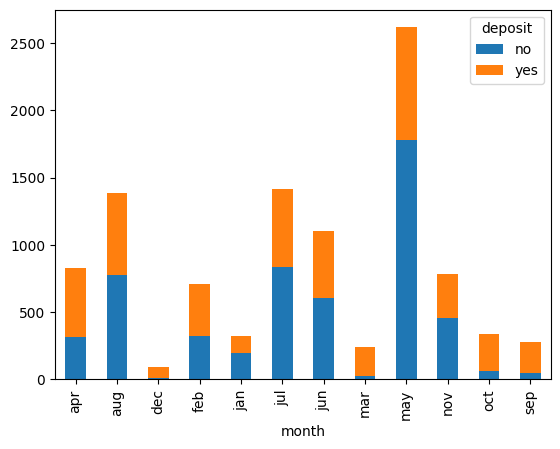

In [188]:
# Используем группировку 'month' по индексу 'deposit'

month = df_nb.groupby('month')['deposit'].value_counts(normalize=False).unstack()
month.plot(kind='bar', stacked='True')

In [189]:
month

deposit,no,yes
month,,
apr,317,513
aug,775,610
dec,9,84
feb,323,386
jan,194,125
jul,836,582
jun,606,498
mar,24,213
may,1776,841


In [190]:
# Создание нового столбца с разницей количества да и нет и вывод минимального значения
month['res'] = month['yes'] - month['no']
month[month['res'] == month['res'].min()].index[0]

'may'

### Задание 3.8

Нам бы очень хотелось посмотреть, люди какого возраста чаще открывают депозиты, а какого — реже. Однако, так как возрастной разброс достаточно большой, визуализация для всех возрастов или нахождение статистики для каждого возраста не будет содержательным. В аналитике принято разделять людей по возрастным подгруппам и делать выводы уже по ним.

Создайте новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

* '<30';
* '30-40';
* '40-50';
* '50-60';
* '60+'.

Совет. После создания этой переменной постройте диаграмму (на ваш вкус), которая, с вашей точки зрения, сможет наилучшим образом отобразить различия в количестве открытых/не открытых депозитов для каждой возрастной группы.

**Функция cut()**, которая используется для разделения значений числовых данных на бины (интервальные группы). Она позволяет создавать новую категориальную переменную на основе диапазонов значений числовых данных.

In [ ]:
# Пример использования

# Создание DataFrame
df = pd.DataFrame({'Результаты':[12, 23, 7, 35, 18, 15, 22, 9, 30]})

# Определение переломных значений (границ бинов)
bins = [0, 10, 20, 30, 40]

# Применение функции cut()
df['Категория'] = pd.cut(df['Результаты'], bins=bins)

# Вывод результата
print(df)

<Axes: xlabel='age_group', ylabel='count'>

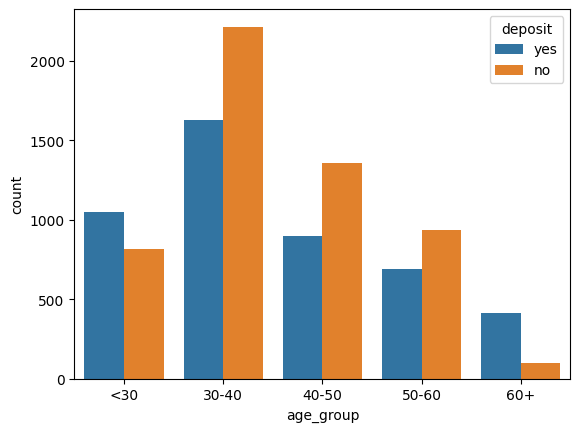

In [191]:
# Создадим колонку с категориями по возрасту и количеством открытия или не открытия депозита
# Для создания категорий используем метод cut()

df_nb['age_group'] = pd.cut(df_nb.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=df_nb)

In [192]:
df_nb

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,30-40
10101,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no,30-40
10102,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no,30-40
10103,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no,40-50


### Задание 3.9 и 3.10

Давайте посмотрим, как зависит соотношение успешных и неуспешных контактов с клиентами от категорий, к которым относятся клиенты:

* семейное положение;
* уровень образования;
* сфера занятости.

Постройте визуализации, отражающие количество тех, кто открыл депозит, и тех, кто его не открыл, для всех категорий предложенных выше трёх признаков. Постарайтесь оформить диаграммы максимально наглядно и описать полученный результат.

К каким категориям относится бόльшая часть людей? Среди каких групп населения есть тенденция соглашаться открывать депозит, а среди каких — отказываться?

[Визуализация данных в Seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/)

У нас есть категориальная переменная и её цифровое значение. countplot аггрегирует данные по значениям категориальной переменной и считает количество значений в каждой категории.

<Axes: xlabel='count', ylabel='marital'>

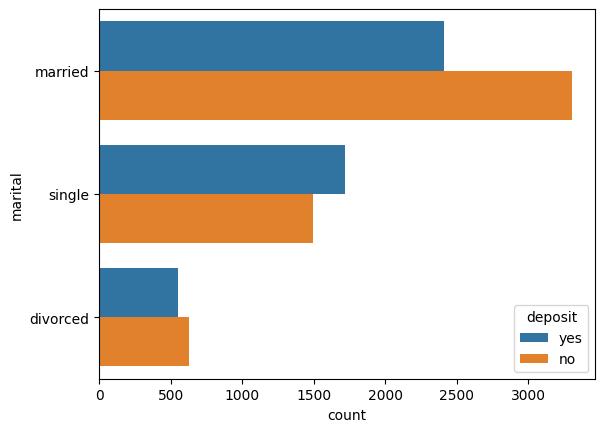

In [193]:
sns.countplot(y='marital', hue='deposit', data=df_nb)

<Axes: xlabel='count', ylabel='education'>

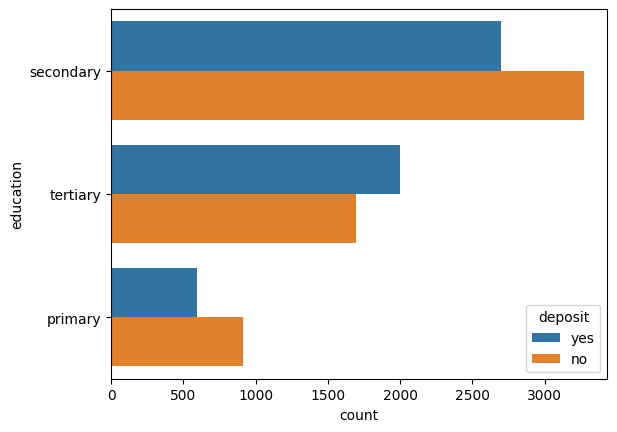

In [70]:
# Используем countplot() из библиотеки seaborn

sns.countplot(y='education', hue='deposit', data=df)

<Axes: xlabel='count', ylabel='job'>

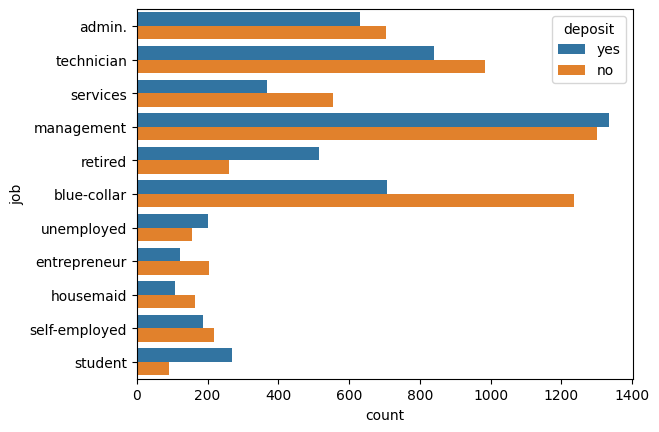

In [71]:
sns.countplot(y='job', hue='deposit', data=df)

### Задание 3.11

В предыдущих заданиях мы посмотрели различные категории отдельно. Но что будет, если посмотреть на пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?

Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части постройте сводную диаграмму по уровню образования и семейному положению. Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? Какой вывод вы можете сделать, исходя из полученных данных?

In [ ]:
# Для начала отфильтруйте в отдельные таблицы тех, кто согласился открыть депозит, и тех, кто не согласился. После этого 
# составьте сводные таблицы и визуализируйте их с помощью тепловых карт. Рекомендуется использовать crosstab().

Описание функции [crosstab](https://dfedorov.spb.ru/pandas/Объяснение%20кросс-таблицы%20в%20Pandas.html)

In [30]:
# Сортировка по колонке deposit
df_nb_yes = df_nb[df_nb['deposit'] == 'yes']
df_nb_no = df_nb[df_nb['deposit'] == 'no']

In [31]:
df_nb_yes_job = pd.crosstab(df_nb_yes.job, df_nb_yes.education)

Text(0.5, 1.0, 'Тепловая карта соотношение типа занятости и уровня образования')

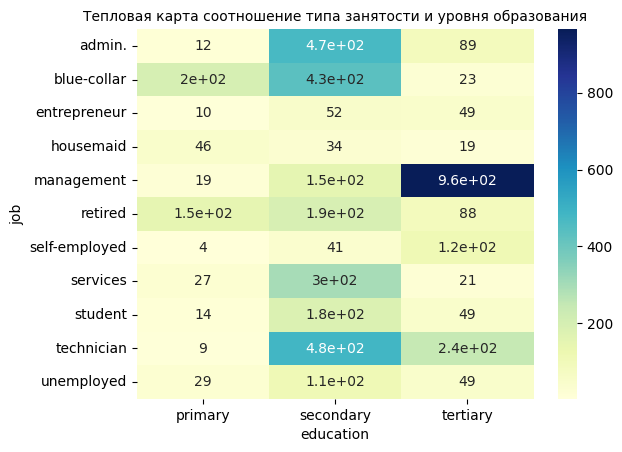

In [32]:
heatmap = sns.heatmap(data=df_nb_yes_job, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение типа занятости и уровня образования', fontsize=10)

In [92]:
df_nb_yes_job_1 = pd.crosstab(df_nb_yes.job, df_nb_yes.marital)

Text(0.5, 1.0, 'Тепловая карта соотношение типа занятости и семейного положения')

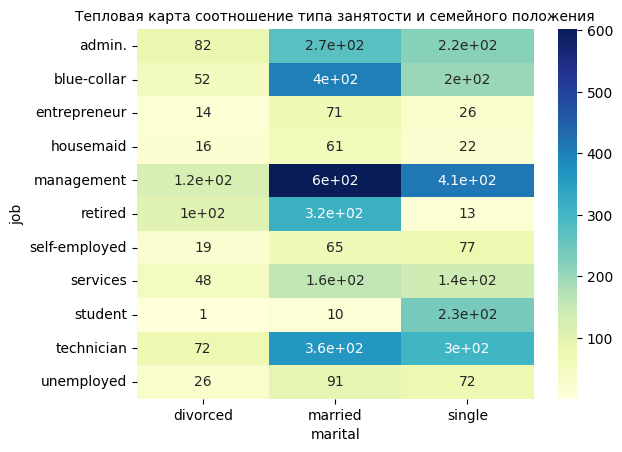

In [94]:
heatmap = sns.heatmap(data=df_nb_yes_job_1, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение типа занятости и семейного положения', fontsize=10)

In [98]:
df_nb_yes_m = pd.crosstab(df_nb_yes.education, df_nb_yes.marital)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и семейного положения')

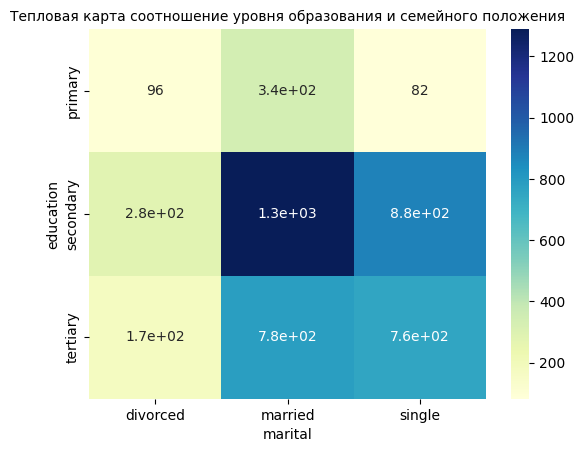

In [99]:
heatmap = sns.heatmap(data=df_nb_yes_m, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и семейного положения', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия просроченного кредита')

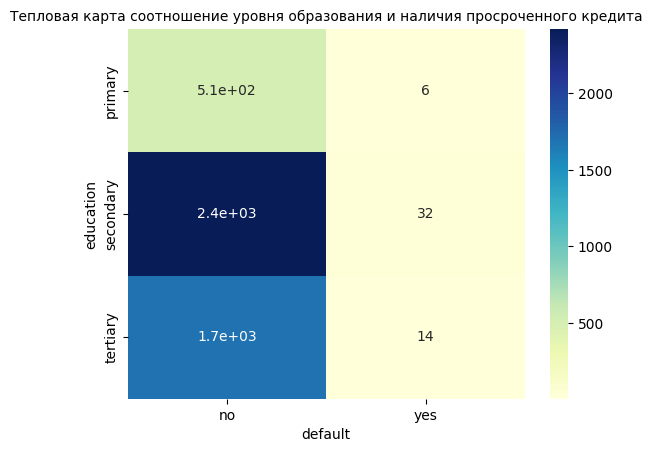

In [16]:
df_nb_yes_d = pd.crosstab(df_nb_yes.education, df_nb_yes.default)
heatmap = sns.heatmap(data=df_nb_yes_d, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия просроченного кредита', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия кредита на жильё')

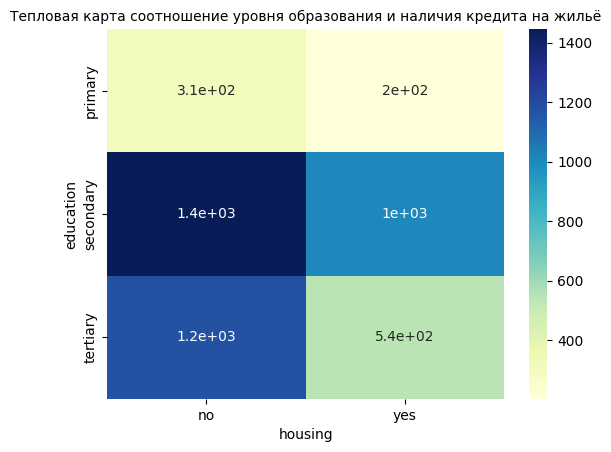

In [18]:
df_nb_yes_h = pd.crosstab(df_nb_yes.education, df_nb_yes.housing)
heatmap = sns.heatmap(data=df_nb_yes_h, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия кредита на жильё', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия кредита на жильё')

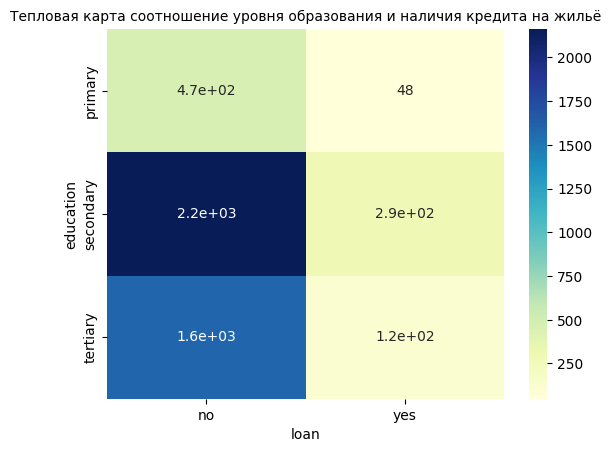

In [20]:
df_nb_yes_l = pd.crosstab(df_nb_yes.education, df_nb_yes.loan)
heatmap = sns.heatmap(data=df_nb_yes_l, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия кредита на жильё', fontsize=10)

### <center>deposit == not

Text(0.5, 1.0, 'Тепловая карта соотношение типа занятости и уровня образования')

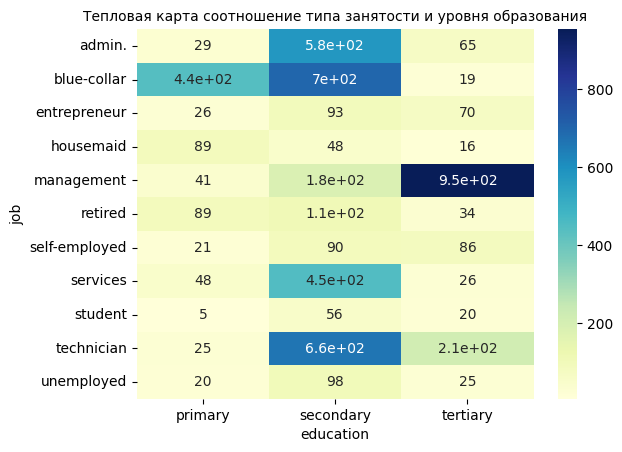

In [100]:
df_nb_no_job = pd.crosstab(df_nb_no.job, df_nb_no.education)
heatmap = sns.heatmap(data=df_nb_no_job, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение типа занятости и уровня образования', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение типа занятости и семейного положения')

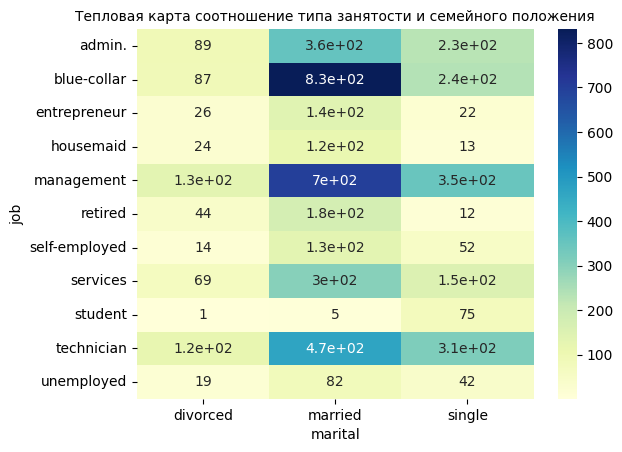

In [101]:
df_nb_no_job_1 = pd.crosstab(df_nb_no.job, df_nb_no.marital)
heatmap = sns.heatmap(data=df_nb_no_job_1, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение типа занятости и семейного положения', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и семейного положения')

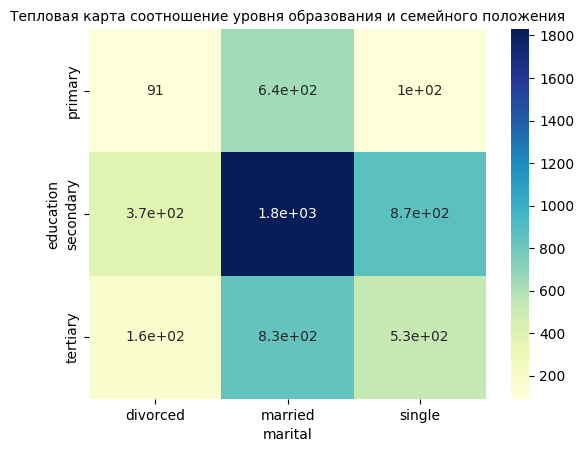

In [102]:
df_nb_no_m = pd.crosstab(df_nb_no.education, df_nb_no.marital)
heatmap = sns.heatmap(data=df_nb_no_m, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и семейного положения', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия просроченного кредита')

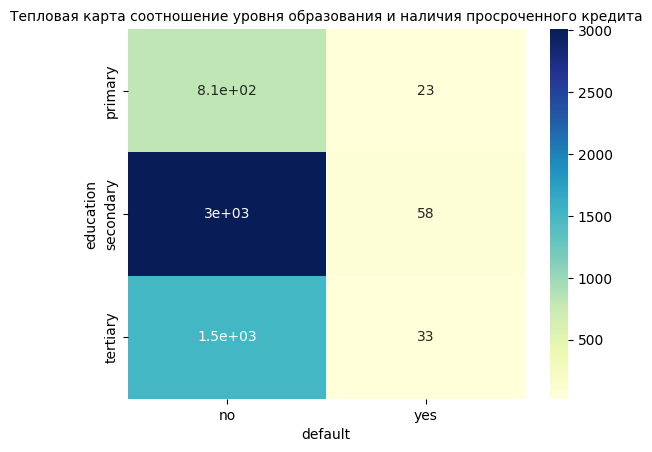

In [21]:
df_nb_no_d = pd.crosstab(df_nb_no.education, df_nb_no.default)
heatmap = sns.heatmap(data=df_nb_no_d, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия просроченного кредита', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия кредита на жильё')

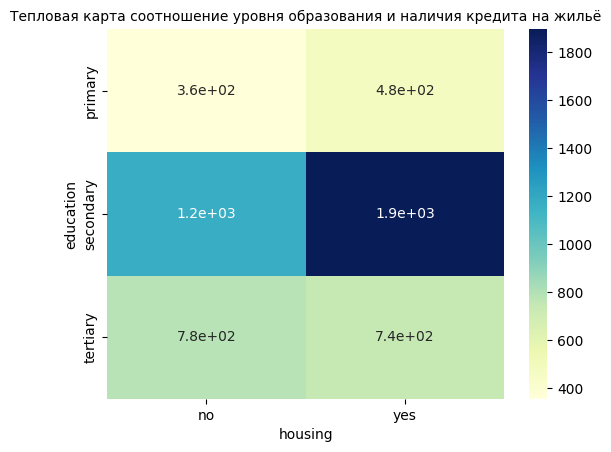

In [22]:
df_nb_no_h = pd.crosstab(df_nb_no.education, df_nb_no.housing)
heatmap = sns.heatmap(data=df_nb_no_h, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия кредита на жильё', fontsize=10)

Text(0.5, 1.0, 'Тепловая карта соотношение уровня образования и наличия кредита на жильё')

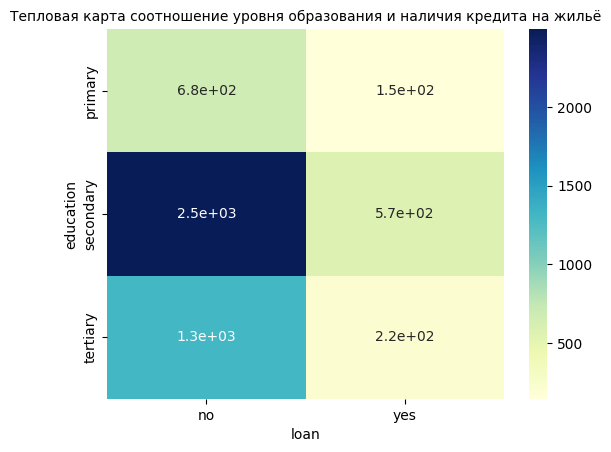

In [23]:
df_nb_no_l = pd.crosstab(df_nb_no.education, df_nb_no.loan)
heatmap = sns.heatmap(data=df_nb_no_l, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта соотношение уровня образования и наличия кредита на жильё', fontsize=10)

⭐Прекрасно! Вы справились с разведывательным анализом и уже кое-что знаете о ваших данных: вы понимаете, какие в целом клиенты обслуживаются в банке, а также знаете, какие возрастные и социальные группы склонны чаще соглашаться на предложение банка.

Советуем не останавливаться на достигнутом и потратить ещё какое-то время на поиски разных интересных паттернов и зависимостей в данных. Запомните те факторы, которые кажутся вам хорошими претендентами на основных предикторов положительного исхода маркетингового взаимодействия: уже скоро вы сможете проверить ваши догадки с помощью машинного обучения.

## 3. Отбор и преобразование признаков


Перед тем как перейти к построению модели, осталось сделать ещё один шаг.

Следует помнить, что алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. По ходу работы алгоритм считает показатели (например, средние значения), которые можно вычислить только для количественных признаков. Поэтому нам необходимо преобразовать категориальные признаки в более удобный формат.
Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить качество модели.
Надо отобрать признаки, которые мы будем использовать для обучения модели.

Начнём с обработки категориального порядкового признака, который отвечает за уровень образования: education.

Обработайте его с помощью метода LabelEncoder, используя метод без дополнительных настроек.

### Задание 4.1

LabelEncoder библиотеки sklearn. Этот класс преобразует n категорий в числа от 1 до n.

In [194]:
# Создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()

# Кодирование признака
df_nb['education'] = lab_enc.fit_transform(df_nb['education'])
df_nb['education'].sum()

11995

In [195]:
df_nb['education'].value_counts()

1    5517
2    3239
0    1349
Name: education, dtype: int64

Ранее мы создали порядковую переменную для возраста. Обработайте её по такому же принципу, чтобы её можно было использовать при обучении модели.

In [196]:
# Кодирование признака
df_nb['age_group'] = lab_enc.fit_transform(df_nb['age_group'])
df_nb['age_group'].sum()

14524

In [197]:
df_nb['age_group'].value_counts()

0    3842
1    2255
4    1870
2    1625
3     513
Name: age_group, dtype: int64

Обычно в задачах бинарной классификации целевую переменную кодируют как бинарный признак, который принимает значения 1 или 0. Так как наш проект будет соответствовать всем правилам хорошего тона, давайте перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

In [198]:
df_nb['deposit'] = df_nb['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [199]:
df_nb['deposit'].value_counts()

0    5424
1    4681
Name: deposit, dtype: int64

Задание 4.2
* Вычислите стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлите до трёх знаков после точки-разделителя.

In [200]:
df_nb['deposit'].std().round(3)

0.499

Сделаем то же самое для других бинарных переменных, которых у нас три:

* 'default';
* 'housing';
* 'loan'.

Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.

In [201]:
col_label = ['default', 'housing', 'loan']
for x in col_label:
    df_nb[x] = df_nb[x].apply(lambda x: 1 if x == 'yes' else 0)

In [202]:
df_nb['default'].value_counts()

0    9939
1     166
Name: default, dtype: int64

Задание 4.3
* Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.

In [203]:
it = 0
for x in col_label:
    it += df_nb[x].mean()
print(f'Сумма средних значений по трём столбцам: {round(it, 3)}')

Сумма средних значений по трём столбцам: 0.635


Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

* 'job';
* 'marital';
* 'contact';
* 'month';
* 'poutcome'.

Создайте для них dummy-переменные и добавьте их в набор данных.

In [205]:
from sklearn.preprocessing  import OneHotEncoder
one_hot_encoder = OneHotEncoder()
columns_to_change = ['job', 'marital', 'contact', 'month', 'poutcome']
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(df_nb[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

# Создание DF с именами колонок и содержимом data
data_codir = pd.DataFrame(columns=column_names, data=data_onehot)

# Объединение двух DF по столбцам
df_new = pd.concat([df_nb, data_codir], axis=1)

In [206]:
df_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

### Задание 4.4

In [ ]:
# Некоторые кодировщики могут удалить признаки после кодировки. Получается, что 'job', 'marital', 'contact', 'month', 
# 'poutcome' могут быть удалены из исходного датафрейма 
# Если сложить 46 + 5, то получим 51, где 'deposit' не в счёт. В итоге, правильный ответ 50.

In [207]:
print(len(df_new.columns) - 1)

50


In [208]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,admin.,married,1,0,45.0,0,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,technician,married,1,0,1270.0,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,services,married,1,0,2476.0,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,admin.,married,2,0,184.0,0,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,33,blue-collar,single,0,0,1.0,1,0,cellular,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10101,39,services,married,1,0,733.0,0,0,unknown,16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10102,32,technician,single,1,0,29.0,0,0,cellular,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10103,43,technician,married,1,0,0.0,0,1,cellular,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [209]:
df_new = df_new.drop(['age', 'job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [211]:
# сохраним полученный df
df_new.to_csv('data/df_new.csv', index=False)

In [3]:
df_new= pd.read_csv('data/df_new.csv')

In [3]:
df_new

,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,2343.0,1,0,5,1042,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,45.0,0,0,5,1467,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,1270.0,1,0,5,1389,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,2476.0,1,0,5,579,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,184.0,0,0,5,673,2,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,0,0,1.0,1,0,20,257,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10101,1,0,733.0,0,0,16,83,4,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10102,1,0,29.0,0,0,19,156,2,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10103,1,0,0.0,0,1,8,9,2,172,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Задание 4.6

Теперь давайте оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

Для этого постройте матрицу корреляций. Дополните её тепловой картой, отражающей результат. Не забудьте, что для того, чтобы вычислить коэффициенты корреляции, необходимо, чтобы целевая переменная была числовой.

В качестве дополнения визуализации к этому заданию постройте столбчатую диаграмму для ранжированных коэффициентов корреляции.

In [4]:
corr = round(df_new.iloc[:,1:].corr(), 2)
corr

,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
default,1.00,-0.11,0.01,0.07,0.02,-0.01,0.03,-0.04,-0.04,-0.04,...,0.02,-0.02,-0.00,0.00,-0.02,-0.02,-0.03,-0.02,-0.04,0.06
balance,-0.11,1.00,-0.09,-0.11,-0.01,0.03,-0.04,0.05,0.06,0.14,...,0.04,0.04,-0.10,0.08,0.06,0.05,0.03,0.03,0.07,-0.09
housing,0.01,-0.09,1.00,0.07,-0.02,0.04,0.01,0.06,-0.00,-0.20,...,-0.07,-0.08,0.43,-0.00,-0.09,-0.09,0.09,0.01,-0.13,0.02
loan,0.07,-0.11,0.07,1.00,0.02,0.00,0.03,-0.03,-0.02,-0.11,...,-0.01,-0.04,0.00,0.02,-0.03,-0.05,0.01,-0.02,-0.08,0.06
day,0.02,-0.01,-0.02,0.02,1.00,-0.02,0.14,-0.08,-0.06,-0.06,...,-0.18,-0.04,-0.01,0.06,0.07,-0.07,-0.07,-0.01,-0.04,0.09
duration,-0.01,0.03,0.04,0.00,-0.02,1.00,-0.04,-0.03,-0.03,0.46,...,-0.00,-0.03,0.01,-0.02,-0.01,-0.01,-0.04,-0.01,-0.03,0.05
campaign,0.03,-0.04,0.01,0.03,0.14,-0.04,1.00,-0.11,-0.05,-0.13,...,0.05,-0.03,-0.04,-0.08,-0.07,-0.05,-0.08,-0.02,-0.09,0.13
pdays,-0.04,0.05,0.06,-0.03,-0.08,-0.03,-0.11,1.00,0.51,0.15,...,-0.09,0.02,0.03,-0.01,0.08,0.11,0.61,0.34,0.33,-0.82
previous,-0.04,0.06,-0.00,-0.02,-0.06,-0.03,-0.05,0.51,1.00,0.14,...,-0.05,0.03,-0.03,0.02,0.06,0.10,0.35,0.32,0.33,-0.63
deposit,-0.04,0.14,-0.20,-0.11,-0.06,0.46,-0.13,0.15,0.14,1.00,...,-0.01,0.14,-0.17,-0.03,0.13,0.13,0.02,0.04,0.29,-0.23


<Axes: >

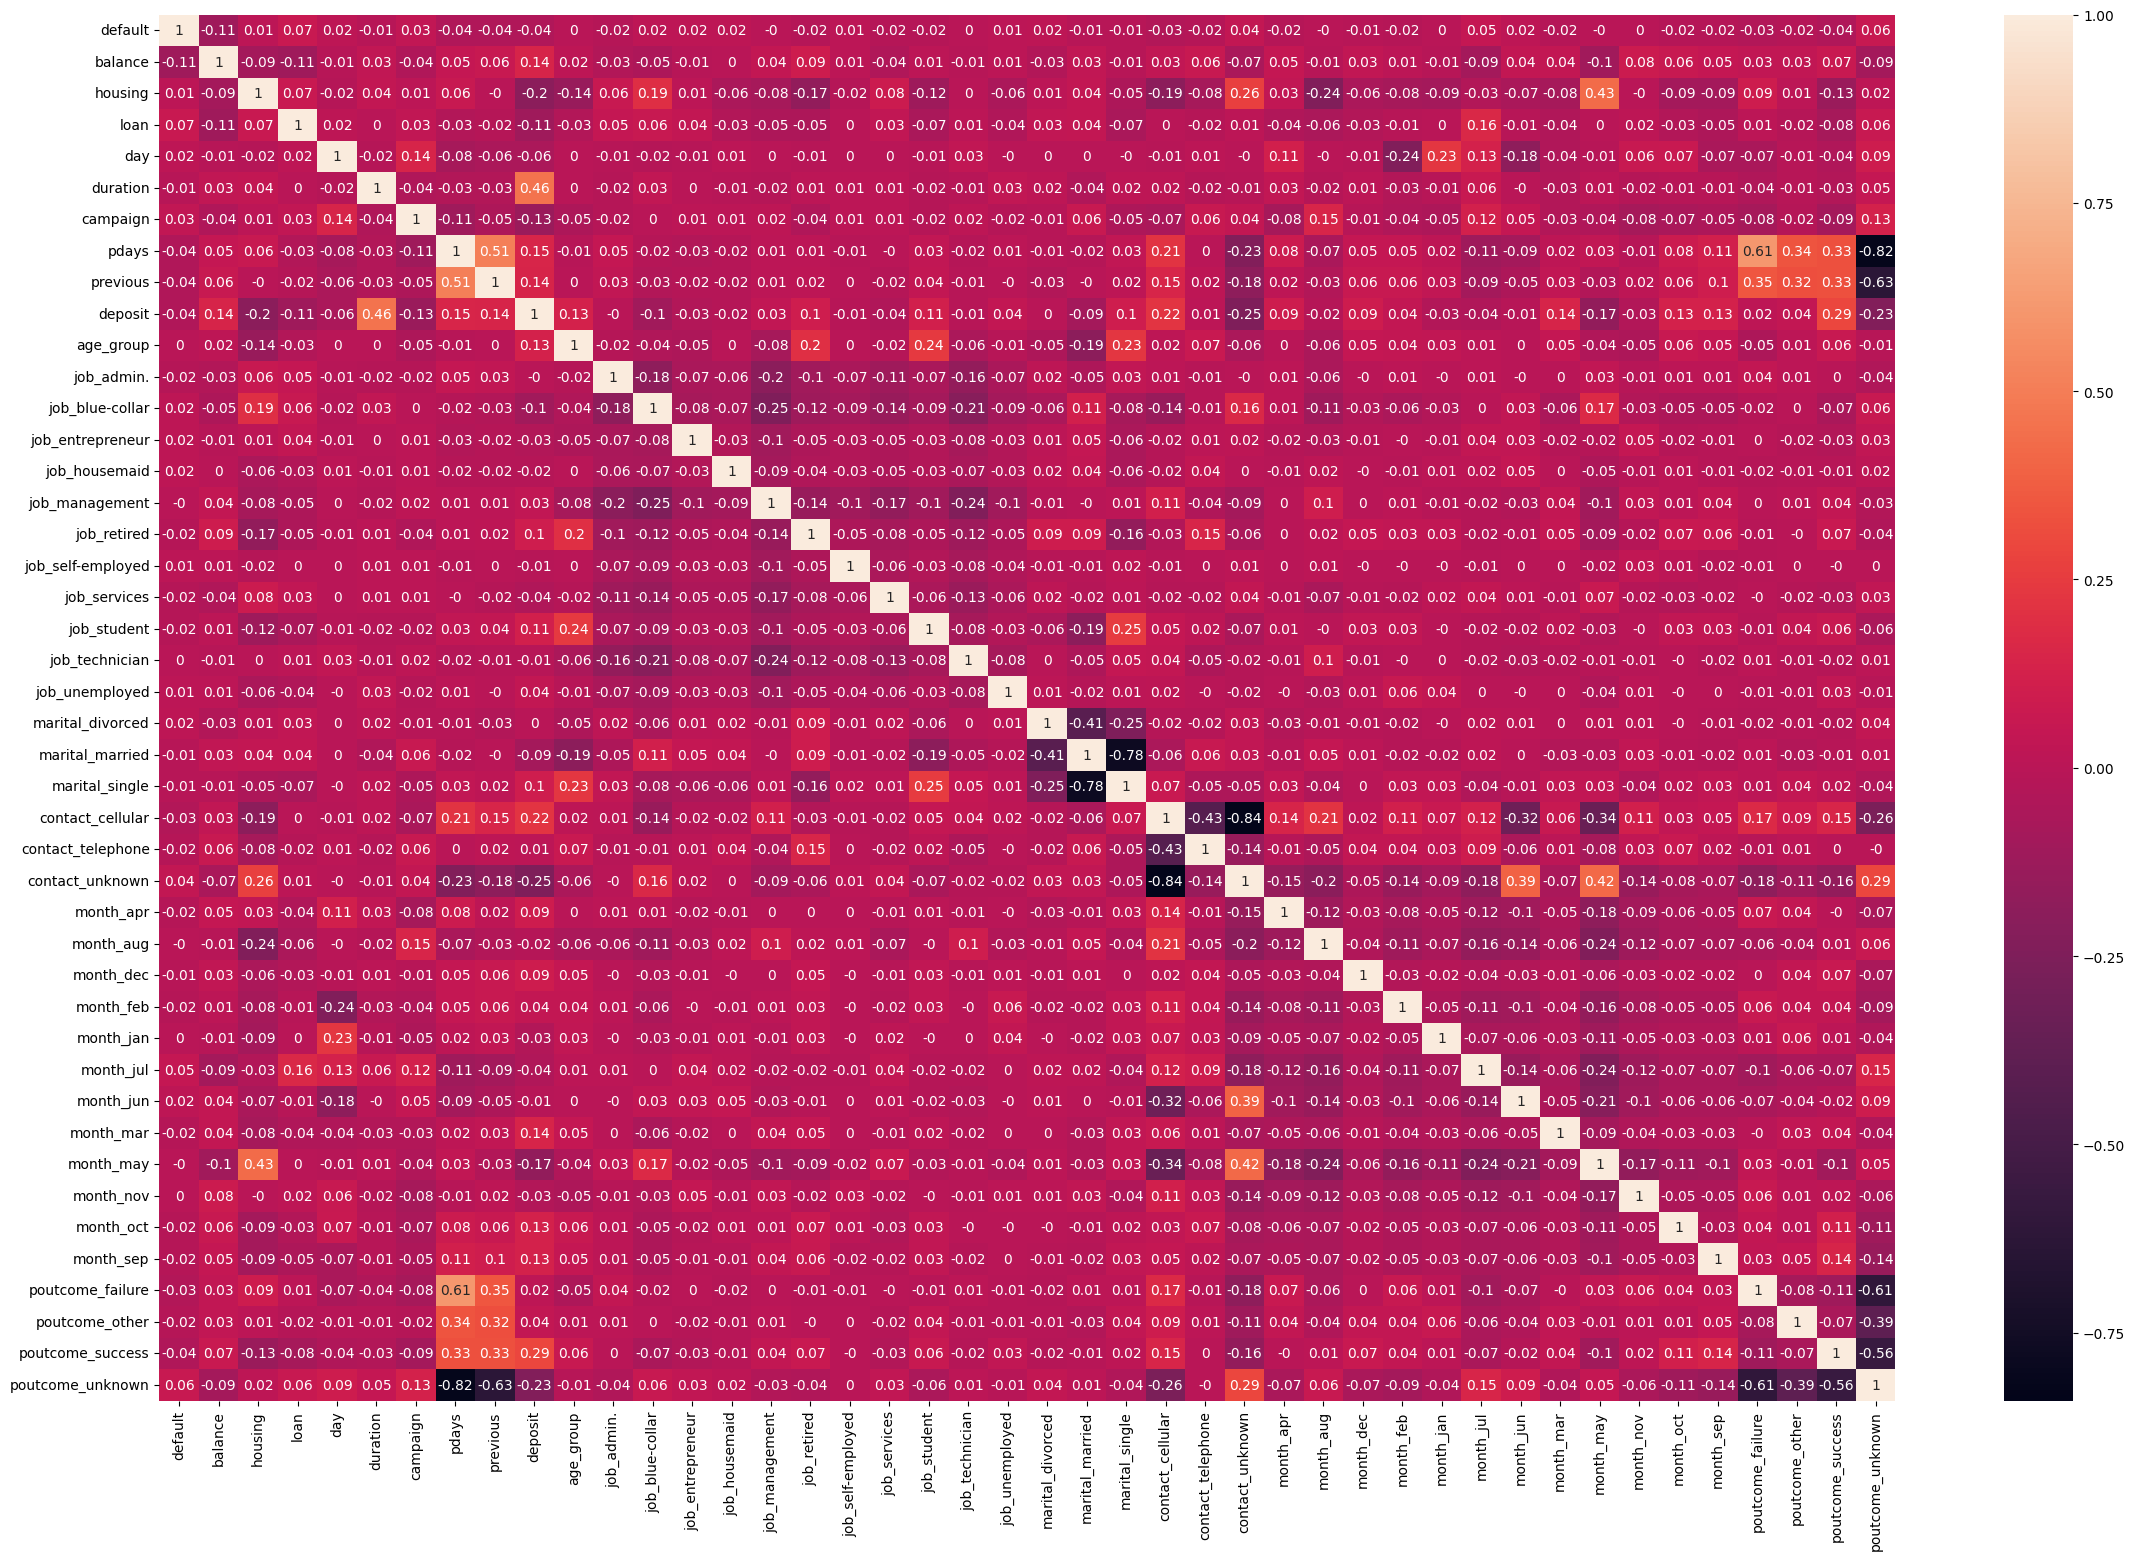

In [249]:
fig = plt.figure(figsize=(28, 18))
sns.heatmap(corr, annot = True)


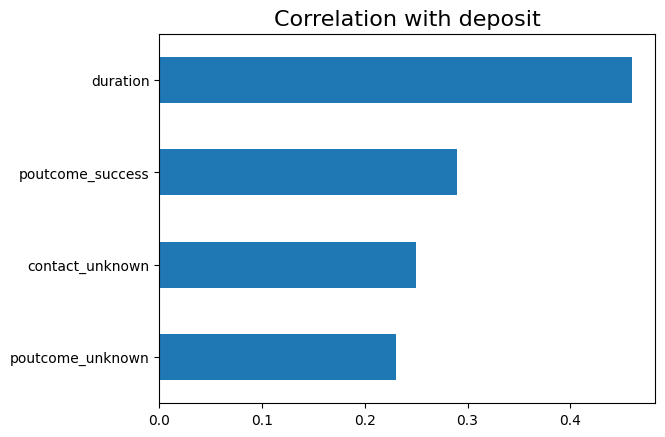

In [227]:
# Проверка корреляции признаков с целевым признаком

corr["deposit"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

Теперь вам необходимо определить целевую переменную и предикторы, а также разделить выборку на обучающую и тестовую.

При разбиении задайте параметр random_state = 42, а размер тестовой выборки возьмите за 0.33. Не забудьте добавить аргумент, определяющий сохранение соотношений целевого признака.

In [5]:
# Создаем матрицу наблюдений
X = df_new.drop('deposit', axis=1)
# Создаем вектор правильных ответов
y = df_new['deposit']

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

Задание 4.7
* Каким получился размер тестовой выборки?

In [6]:
X_test.shape[0]

3335

Задание 4.8
* Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [6]:
round(y_test.mean(), 2)

0.46

### Задание 4.9

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберите 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_classif.

Помните, что на данном этапе вам необходимо оставить только те признаки, которые содержат лишь числовые значения.

In [ ]:
# Обязательно контролируем признаки, которые были отобраны SelectKBest (15 признаков)

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

In [7]:
# Выбор максимально скоррелированных признаков в кол-ве указанном в к
selector = SelectKBest(f_classif,  k=15)
selector.fit(X, y)
# Колонки попавшие в этот отбор 
selector.get_feature_names_out()

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [8]:
# Эта процедура также отбирает лучшие признаки, Выходной тип матрица
X_new = SelectKBest(f_classif, k=15).fit_transform(X_train, y_train)
X_new.shape

(6770, 15)

In [9]:
X_train.shape

(6770, 44)

In [12]:
X_new

array([[5.570e+02, 1.000e+00, 5.130e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.900e+01, 0.000e+00, 2.960e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 3.990e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.324e+03, 0.000e+00, 1.220e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.090e+02, 0.000e+00, 6.050e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.680e+02, 0.000e+00, 3.940e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [10]:
# Создание списка колонок из лучших атрибутов
best_columns = list(selector.get_feature_names_out())

In [14]:
best_columns

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 4.10

Теперь данные необходимо нормализовать.

Есть разные варианты нормализации, но мы будем использовать min-max-нормализацию.

Помните, что нормализация требуется для предикторов, а не для целевой переменной.

Нормализуйте предикторы в обучающей и тестовой выборках.

In [11]:
# На основе отобранных лучших признаков создаём новый DF
X = X[best_columns]

In [12]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

In [13]:
X_train.shape

(6770, 15)

In [29]:
X_test.shape

(3335, 15)

In [14]:
# Нормализайия методом MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_test_scaled = scaler.transform(X_test)      # fransform() на test данных

print(X_test_scaled[:, 0].mean())  # для признака balance, обратите внимание именно на столбец

0.46823674223097866


In [22]:
df_best = X
df_best['deposit'] = y

In [23]:
df_best.head(2)

,balance,housing,duration,campaign,pdays,previous,age_group,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown,deposit
0,2343.0,1,1042,1,-1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,45.0,0,1467,1,-1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


<AxesSubplot:>

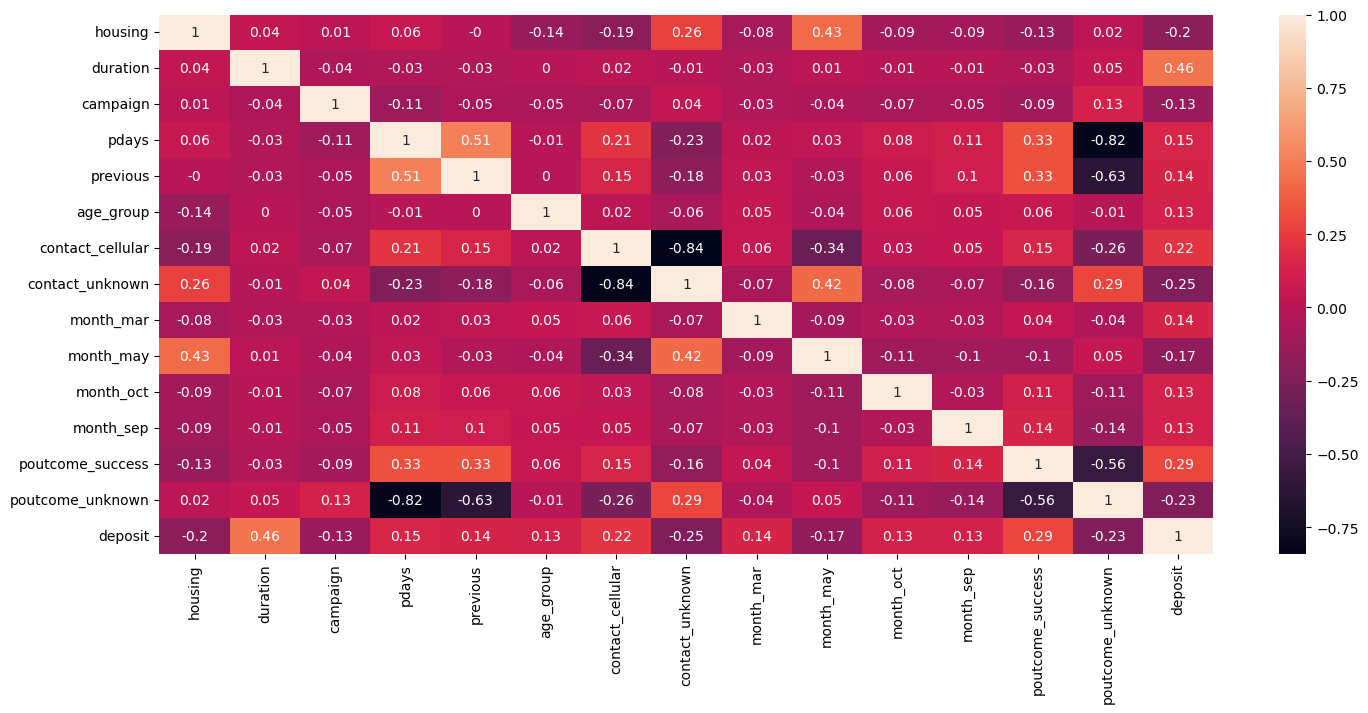

In [24]:
corr = round(df_best.iloc[:,1:].corr(), 2)
fig = plt.figure(figsize=(17, 7))
sns.heatmap(corr, annot = True)

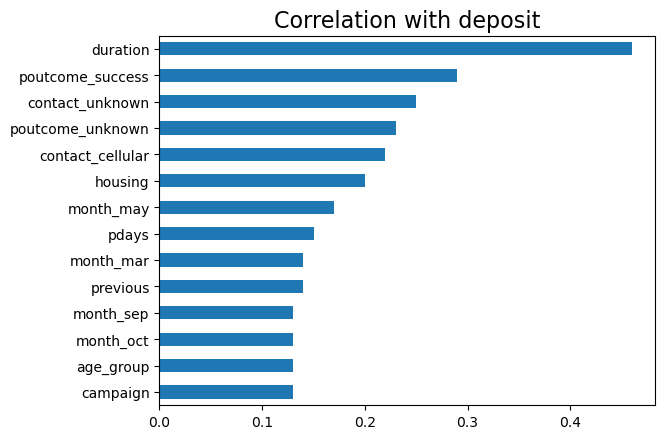

In [28]:
# Проверка корреляции признаков с целевым признаком

corr["deposit"].apply(lambda x: abs(x))[:-1].sort_values().plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

## 4. Решение задачи классификации: логистическая регрессия и решающие деревья

Общая информация. Полученные метрики могут иметь небольшое расхождение с результатами ответов на платформе (~0.1-0.3). Объясняется это выбором версии sklearn.  

Для начала реализуем самый простой алгоритм, который вам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оцените качество модели на тестовой выборке.

### Задание 5.1

In [29]:
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [30]:
#Делаем предсказание моделью на тестовой выборке
y_pred = log_reg.predict(X_test_scaled)
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.81


### Задание 5.2

Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

* criterion = 'entropy';
* random_state = 42.

Остальные параметры оставьте по умолчанию.

In [33]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
#Делаем предсказание моделью на тестовой выборке
y_pred_test = dt.predict(X_test_scaled)
#Делаем предсказание моделью на тренировочной выборке
y_pred_train = dt.predict(X_train_scaled)
#Рассчитываем accuracy на тестовой выборке
print('Accuracy на тестовой выборке: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))
#Рассчитываем accuracy на тренировочной выборке
print('Accuracy на тренировочной выборке: {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))

Accuracy на тестовой выборке: 0.75
Accuracy на тренировочной выборке: 1.00


Переберите различные максимальные глубины деревьев и найдите глубину дерева, для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения (т. е. не будет расти качество на обучающей выборке при неизменном качестве на тестовой).

In [35]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth': list(np.linspace(1, 30, 30, dtype=int)),
              'criterion':['entropy']
              }
random_search_tree = RandomizedSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_distributions=param_distributions,  
    cv=5,
    n_iter = 50, 
    n_jobs = -1
)  
%time random_search_tree.fit(X_train_scaled, y_train) 
#Делаем предсказание моделью на тестовой выборке
y_pred_test = random_search_tree.predict(X_test_scaled)
#Делаем предсказание моделью на тренировочной выборке
y_pred_train = random_search_tree.predict(X_train_scaled)
#Рассчитываем accuracy на тестовой выборке
print('Accuracy на тестовой выборке: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))
#Рассчитываем accuracy на тренировочной выборке
print('Accuracy на тренировочной выборке: {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_tree.best_params_))

CPU times: total: 500 ms
Wall time: 15.4 s
Accuracy на тестовой выборке: 0.81
Accuracy на тренировочной выборке: 0.85
Наилучшие значения гиперпараметров: {'max_depth': 9, 'criterion': 'entropy'}


### Задание 5.5

Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Реализуйте оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:
* 'min_samples_split': [2, 5, 7, 10];
* 'max_depth':[3,5,7].

In [42]:
from sklearn.model_selection import GridSearchCV

parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7], 'criterion':['entropy', 'gini']}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
                        parameters,
                        cv=3, scoring=('f1'), 
                        return_train_score=True)

%time grid_search.fit(X_train_scaled, y_train) 

y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


CPU times: total: 3.84 s
Wall time: 4.57 s
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 7}


In [43]:
param_grid = {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}

grid_search_1 = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42, criterion='entropy'), 
    param_grid=param_grid, 
    cv=3, 
    n_jobs = -1
)  

%time grid_search_1.fit(X_train_scaled, y_train) 

y_test_pred = grid_search_1.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

CPU times: total: 219 ms
Wall time: 5.97 s
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 7}


## 5. Решение задачи классификации: ансамбли моделей и построение прогноза

Вы уже смогли обучить несложные модели, и теперь пришло время усложнить их, а также посмотреть, улучшится ли результат (если да, то насколько). Вы обучили решающие деревья, и теперь пришла пора объединить их в случайный лес.

Обучите случайный лес со следующими параметрами:

* n_estimators = 100;
* criterion = 'gini';
* min_samples_leaf = 5;
* max_depth = 10;
* random_state = 42.

### Задание 6.1

Оцените метрики accuracy и recall для построенной модели на тестовой выборке. В качестве ответов введите значения метрик. Ответ округлите до двух знаков после точки-разделителя.

In [45]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)

y_test_pred = rf.predict(X_test_scaled)
print('Accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Accuracy на тестовом наборе: 0.83
Recall на тестовом наборе: 0.83


### Задание 6.2

Дата-сайентист не должен останавливаться на одной модели — он должен пробовать все доступные варианты. Поэтому теперь предлагаем вам сравнить полученные результаты с моделью градиентного бустинга. Используйте градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

* learning_rate = 0.05;
* n_estimators = 300;
* min_samples_leaf = 5;
* max_depth = 5;
* random_state = 42.

Для построенной модели оцените метрику F1 на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя

In [49]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)
# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, gb_pred)))

f1_score на тестовом наборе: 0.82


### Задание 6.4

Вы уже попробовали построить разные модели, и теперь пришло время построить ансамбль из моделей разного типа.

В этом задании вам необходимо использовать стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используйте модель логистической регрессии.

Параметры оставьте те же, что были в ваших алгоритмах в предыдущих заданиях.

Для построенной модели оцените метрику precision на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.

In [50]:
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)
stack_pred = stack.predict(X_test_scaled)
print('Precision на тестовом наборе: {:.2f}'.format(metrics.precision_score(y_test, stack_pred)))

Precision на тестовом наборе: 0.81


### Задание 6.6

Ранее мы уже рассматривали оптимизацию гиперпараметров при помощи GridSearch. Однако вы знаете, что это не единственный способ. Один из более продвинутых вариантов оптимизации гиперпараметров — фреймворк Optuna. Примените его для оптимизации гиперпараметров. Для перебора возьмите случайный лес и следующие параметры:

* n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
* max_depth = trial.suggest_int('max_depth', 10, 30, 1);
* min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).

In [54]:
import optuna
random_state = 42

In [52]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_test, model.predict(X_test_scaled))

  return score

In [55]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-11-29 17:29:12,911] A new study created in memory with name: RandomForestClassifier


[I 2023-11-29 17:29:17,947] Trial 0 finished with value: 0.8222711544510853 and parameters: {'n_estimators': 138, 'max_depth': 20, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8222711544510853.
[I 2023-11-29 17:29:22,129] Trial 1 finished with value: 0.8211920529801324 and parameters: {'n_estimators': 145, 'max_depth': 21, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8222711544510853.
[I 2023-11-29 17:29:25,696] Trial 2 finished with value: 0.8206744405924993 and parameters: {'n_estimators': 164, 'max_depth': 14, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8222711544510853.
[I 2023-11-29 17:29:28,761] Trial 3 finished with value: 0.8187539332913782 and parameters: {'n_estimators': 134, 'max_depth': 21, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8222711544510853.
[I 2023-11-29 17:29:32,332] Trial 4 finished with value: 0.8122020972354623 and parameters: {'n_estimators': 158, 'max_depth': 22, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.82

CPU times: total: 1min 5s
Wall time: 1min 14s


In [57]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на тестовом наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 138, 'max_depth': 20, 'min_samples_leaf': 3}
f1_score на тестовом наборе: 0.82


In [62]:
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.82


In [59]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train_scaled, y_train)
y_test_pred_o = model.predict(X_test_scaled)
print('Accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred_o)))

Accuracy на тестовом наборе: 0.83


In [60]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))

accuracy на тестовом наборе: 0.83
